In [1]:
import torch
import random
import unidecode
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import wordcloud


In [2]:
ALPHABET = 'abcdefghijklmnopqrstuvwxyz-^*'
N = len(ALPHABET)

def normalize(s):
    global ALPHABET
    s = unidecode.unidecode(s)
    s = s.lower()
    s = ''.join(c for c in s if c in ALPHABET)
    return s

normalize('HéRésIe!')

'heresie'

In [3]:
def extract_from_txt(file_name_in, file_name_out):
    """extract unique words from a text file and write them to another file (one per line); also normalize them"""
    words_list = []
    with open(file_name_in, 'r', encoding='UTF8') as f:
        for line in f.readlines():
            for word in line.split():
                word = normalize(word)
                if word not in words_list:
                    words_list.append(word)
    words_list.remove('')
    words_list.remove('-')
    words_list.sort()
    with open(file_name_out, 'w', encoding='UTF8') as f:
        for word in words_list:
            f.write(word + '\n')
    return len(words_list)

# BOOK_FILE = 'data/twilight.txt'
BOOK_FILE = 'data/a_tale_of_two_cities.txt'
WORDS_FILE = 'data/words_raw.txt'
extract_from_txt(BOOK_FILE, WORDS_FILE)


11045

In [4]:
def normalize_txt(file_name_in, file_name_out):
    """normalize a text file and write it to another file"""
    c = 0
    with open(file_name_in, 'r', encoding='UTF8') as f:
        with open(file_name_out, 'w', encoding='UTF8') as g:
            prev = ''
            for line in f.readlines():
                n_line = normalize(line)
                if n_line == prev or n_line == '-' or n_line == '*' or n_line == '^'\
                    or n_line.count('-')>1 or n_line.count('*')>1 or n_line.count('^')>1:
                    pass
                else:
                    g.write(n_line+'\n')
                    prev = n_line
                    c += 1
    return c

normalize_txt('data/mots_brut.txt', 'data/mots.txt'), normalize_txt('data/words_raw.txt', 'data/words.txt')


(22014, 10327)

In [5]:
def txt_to_js(file_name):
    """put list of word from a txt file in a js variable, loadable from a file"""
    with open(file_name+'.txt', 'r') as f:
        with open(file_name+'.js', 'w') as g:
            g.write("const " + file_name.upper().replace('DATA/', '') + " = [\n")
            for line in f.readlines():
                if line != '\n':
                    g.write('\t\'' + line.strip() + '\',\n')
            g.write('];\n')

def extended_txt_to_js(file_name):
    """put list of word from a txt file in a js variable, loadable from a file"""
    with open(file_name+'.txt', 'r') as f:
        with open(file_name+'_extended.js', 'w') as g:
            g.write("const " + file_name.upper().replace('DATA/', '') + " = [\n")
            for line in f.readlines():
                if line != '\n':
                    g.write('\t\'^' + line.strip() + '*\',\n')
            g.write('];\n')

txt_to_js('data/mots')
txt_to_js('data/words')
extended_txt_to_js('data/mots')
extended_txt_to_js('data/words')

In [6]:
DICTIONARY_FILE = 'data/words.txt'
WORDS_LIST = []
with open(DICTIONARY_FILE, 'r', encoding='UTF8') as f:
    for line in f.readlines():
        WORDS_LIST.append('^'+line.strip()+'*')

FICHIER_DICTIONAIRE = 'data/mots.txt'
LISTE_MOTS = []
with open(FICHIER_DICTIONAIRE, 'r', encoding='UTF8') as f:
    for line in f.readlines():
        LISTE_MOTS.append('^'+line.strip()+'*')

In [7]:
letters_usage = np.zeros(N)
words_lengths = np.zeros(30)

for word in WORDS_LIST:
    for ch in word:
        if ch != '^' and ch != '*':
            letters_usage[ALPHABET.index(ch)] += 1
    words_lengths[len(word)-2] += 1

utilisation_lettres = np.zeros(N)
longueurs_mots = np.zeros(30)
for mot in LISTE_MOTS:
    for ch in mot:
        if ch != '^' and ch != '*':
            utilisation_lettres[ALPHABET.index(ch)] += 1
    longueurs_mots[len(mot)-2] += 1

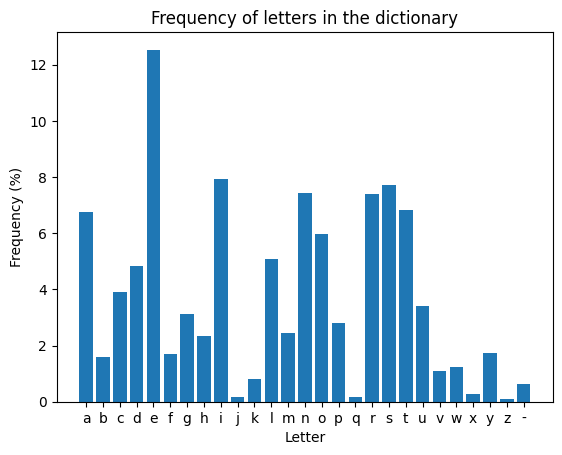

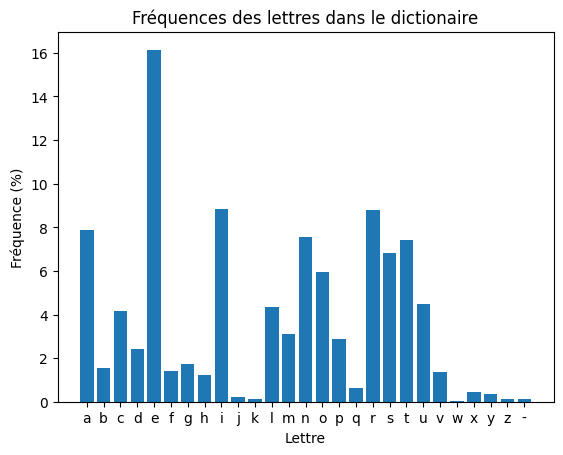

In [8]:
plt.bar(range(N-2), 100*letters_usage[:-2]/sum(letters_usage))
plt.xticks(range(N-2), ALPHABET[:-2])
plt.xlabel('Letter')
plt.ylabel('Frequency (%)')
plt.savefig('images/letters_frequency.png', dpi=300, bbox_inches='tight')
plt.title('Frequency of letters in the dictionary')
plt.show()

plt.bar(range(N-2), 100*utilisation_lettres[:-2]/sum(utilisation_lettres))
plt.xticks(range(N-2), ALPHABET[:-2])
plt.xlabel('Lettre')
plt.ylabel('Fréquence (%)')
plt.savefig('images/frequence_lettres.png', dpi=300, bbox_inches='tight')
plt.title('Fréquences des lettres dans le dictionaire')
plt.show()


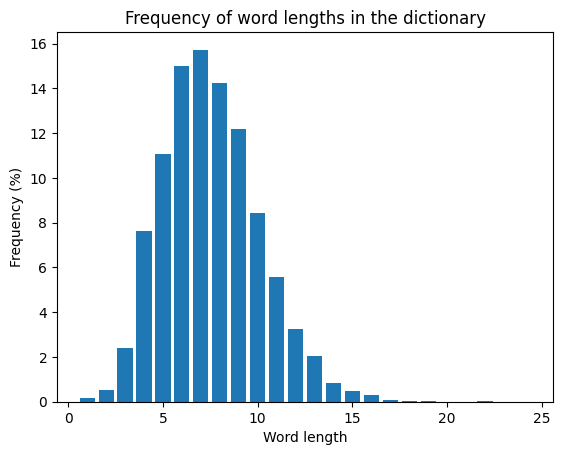

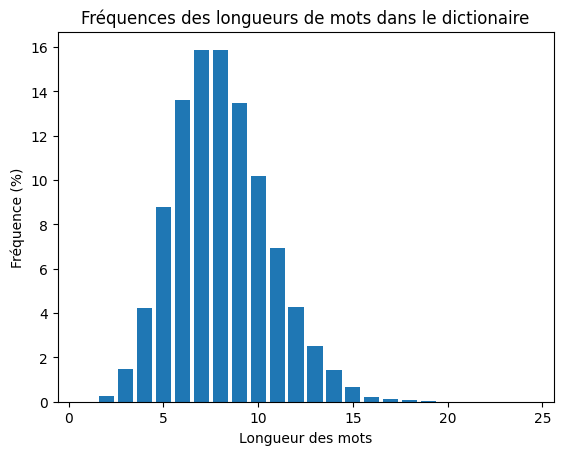

In [9]:
plt.bar(range(1,25), 100*words_lengths[1:25]/sum(words_lengths))
plt.xlabel('Word length')
plt.ylabel('Frequency (%)')
plt.savefig('images/word_lengths_frequency.png', dpi=300, bbox_inches='tight')
plt.title('Frequency of word lengths in the dictionary')
plt.show()

plt.bar(range(1,25), 100*longueurs_mots[1:25]/sum(longueurs_mots))
plt.xlabel('Longueur des mots')
plt.ylabel('Fréquence (%)')
plt.savefig('images/frequence_longueurs_mots.png', dpi=300, bbox_inches='tight')
plt.title('Fréquences des longueurs de mots dans le dictionaire')
plt.show()


In [10]:
def stats_to_js(file_name):
    global ALPHABET, N
    WORDS_LIST = []
    with open(file_name+'.txt', 'r', encoding='UTF8') as f:
        for line in f.readlines():
            WORDS_LIST.append(line.strip())
    letters_usage = np.zeros(N)
    words_lengths = np.zeros(30)
    for word in WORDS_LIST:
        for ch in word:
            letters_usage[ALPHABET.index(ch)] += 1
        words_lengths[len(word)] += 1
    with open(file_name+'_stats.js', 'w', encoding='UTF8') as g:
        g.write("const " + file_name.upper().replace('DATA/', '') + "_LETTERS_FREQUENCIES = {\n")
        for letter,freq in zip(ALPHABET, letters_usage):
            g.write(f'\t"{letter}": {int(freq)},\n')
        g.write("};\n")
        g.write(f"const {file_name.upper().replace('DATA/', '')}_LETTERS_FREQUENCIES_TOTAL = {int(sum(letters_usage))};\n\n")
        g.write(f"const {file_name.upper().replace('DATA/', '')}_LENGTHS = [\n")
        for freq in words_lengths:
            g.write(f'\t{int(freq)},\n')
        g.write("];\n")
        g.write(f"const {file_name.upper().replace('DATA/', '')}_LENGTHS_TOTAL = {int(sum(words_lengths))};\n")

stats_to_js('data/mots')
stats_to_js('data/words')


In [11]:
frequence = {}
for ch in ALPHABET:
    frequence[ch] = utilisation_lettres[ALPHABET.index(ch)]/sum(utilisation_lettres)

frequency = {}
for ch in ALPHABET:
    frequency[ch] = letters_usage[ALPHABET.index(ch)]/sum(letters_usage)

freq = {}
for ch in ALPHABET[:-2]:
    freq[ch] = 1/(N-2)


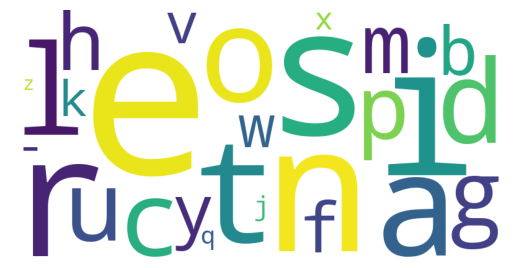

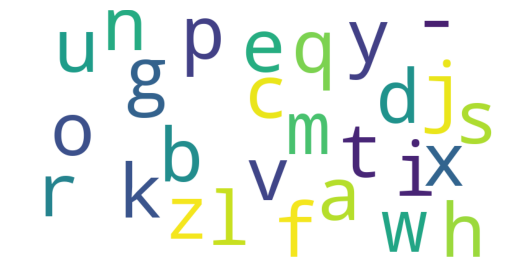

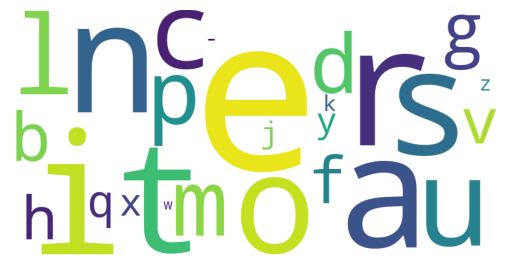

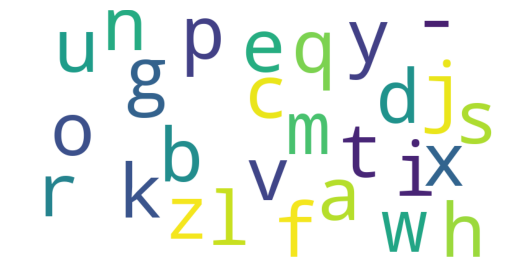

In [12]:
lettercloud = wordcloud.WordCloud(background_color = 'white', prefer_horizontal=1, random_state=0, width=800, height=400)
lettercloud.fit_words(frequency)
plt.imshow(lettercloud)
plt.axis("off")
plt.savefig('images/lettercloud.png', dpi=300, bbox_inches='tight')
plt.show()

lettercloud1 = wordcloud.WordCloud(background_color = 'white', prefer_horizontal=1, random_state=0, width=800, height=400, max_font_size=120, min_font_size=120)
lettercloud1.fit_words(freq)
plt.imshow(lettercloud1)
plt.axis("off")
plt.savefig('images/lettercloud1.png', dpi=300, bbox_inches='tight')
plt.show()



nuagedelettres = wordcloud.WordCloud(background_color = 'white', prefer_horizontal=1, random_state=0, width=800, height=400)
nuagedelettres.fit_words(frequence)
plt.imshow(nuagedelettres)
plt.axis("off")
plt.savefig('images/nuagedelettres.png', dpi=300, bbox_inches='tight')
plt.show()

nuagedelettres1 = wordcloud.WordCloud(background_color = 'white', prefer_horizontal=1, random_state=0, width=800, height=400, max_font_size=120, min_font_size=120)
nuagedelettres1.fit_words(freq)
plt.imshow(nuagedelettres1)
plt.axis("off")
plt.savefig('images/nuagedelettres1.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
nextS = [np.zeros([N]*k) for k in range(1,7)]
for word in WORDS_LIST:
    l = [ALPHABET.index(ch) for ch in word]
    for k in range(1,len(nextS)+1):
        for i in range(len(l)-k+1):
            nextS[k-1][tuple(l[i:i+k])] += 1

nextSfr = [np.zeros([N]*k) for k in range(1,7)]
for word in LISTE_MOTS:
    l = [ALPHABET.index(ch) for ch in word]
    for k in range(1,len(nextS)+1):
        for i in range(len(l)-k+1):
            nextSfr[k-1][tuple(l[i:i+k])] += 1


In [14]:
def plot_next(letters, filename=None, lang='en'):
    global nextS, nextSfr
    global ALPHABET
    used_letters = letters[-len(nextS)+2:]
    if used_letters != letters:
        print('Used letters:', used_letters)
    letters_indexes = tuple([ALPHABET.index(letter) for letter in used_letters])
    if lang == 'en':
        Y = nextS[min(len(letters_indexes)+1, len(nextS)-1)][letters_indexes]
    elif lang == 'fr':
        Y = nextSfr[min(len(letters_indexes)+1, len(nextS)-1)][letters_indexes]
    Ynorm = Y/Y.sum(axis=1, keepdims=True)
    plt.imshow(Ynorm*100, norm=mpl.colors.LogNorm())
    plt.xticks(range(N), ALPHABET)
    plt.yticks(range(N), [used_letters+ch for ch in ALPHABET])
    plt.clim(0.01,100)
    plt.colorbar(format=mticker.FuncFormatter(lambda x, y: str(int(x) if x>1 else x)+'%') )
    if lang == 'en':
        plt.xlabel('Next letter')
        plt.ylabel('Current letter')
    elif lang == 'fr':
        plt.xlabel('Lettre suivante')
        plt.ylabel('Lettre courante')
    if filename is not None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_40792\2898628047.py:12: RuntimeWarning: invalid value encountered in divide
  Ynorm = Y/Y.sum(axis=1, keepdims=True)


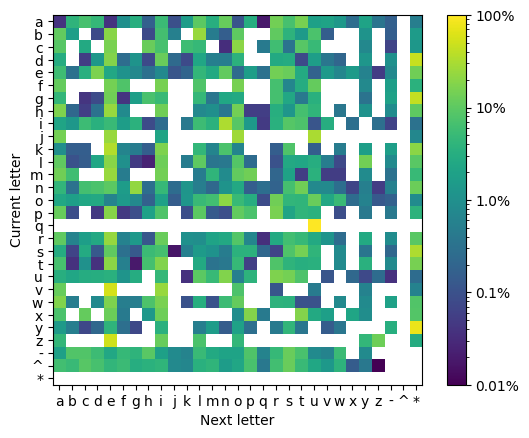

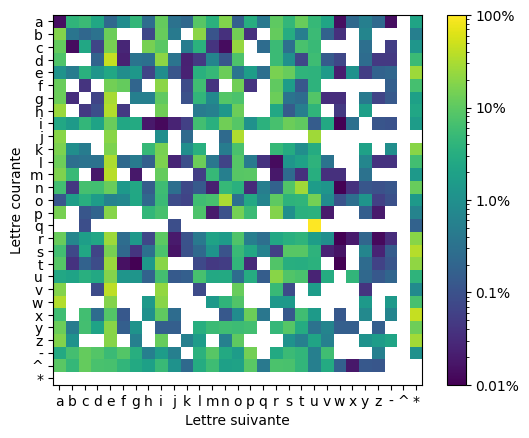

In [15]:
plot_next('', 'images/markov_letter.png')
plot_next('', 'images/markov_letter-fr.png', lang='fr')

In [16]:
# plot_next('^')
# plot_next('^a')
# plot_next('^al')
# plot_next('^alt')
# plot_next('^alth')
# plot_next('^althi')

In [51]:
def plot_next1(letters='^', filename=None, lang='en', n_letters=1, maxi=1):
    global nextS, nextSfr
    global ALPHABET
    used_letters = letters[-min(len(nextS)+1, n_letters):]
    not_used_letters = letters[:-min(len(nextS)+1, n_letters)]
    if used_letters != letters:
        print('Used letters:', used_letters)
        print('Not used letters:', not_used_letters)
    letters_indexes = tuple([ALPHABET.index(letter) for letter in used_letters])
    if lang == 'en':
        Y1 = nextS[len(letters_indexes)][letters_indexes]
    elif lang == 'fr':
        Y1 = nextSfr[len(letters_indexes)][letters_indexes]
    plt.bar(range(N),Y1/(Y1.sum()))
    plt.ylim(0,maxi)
    plt.xticks(range(N), ALPHABET[:])
    plt.yticks(ticks = plt.yticks()[0], labels = [str(round(x*100,2))+'%' for x in plt.yticks()[0]])
    plt.title("$\\rm{" + not_used_letters.replace('^', '\\wedge ') + "}$"\
              + "$\\bf{" + str(used_letters.replace('^', '\\wedge ')) + "}$"\
                +'_')
    if lang == 'en':
        plt.xlabel('Next letter')
        plt.ylabel('Frequency (%)')
    elif lang == 'fr':
        plt.xlabel('Lettre suivante')
        plt.ylabel('Fréquence (%)')
    if filename is not None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

Used letters: d
Not used letters: ^abc


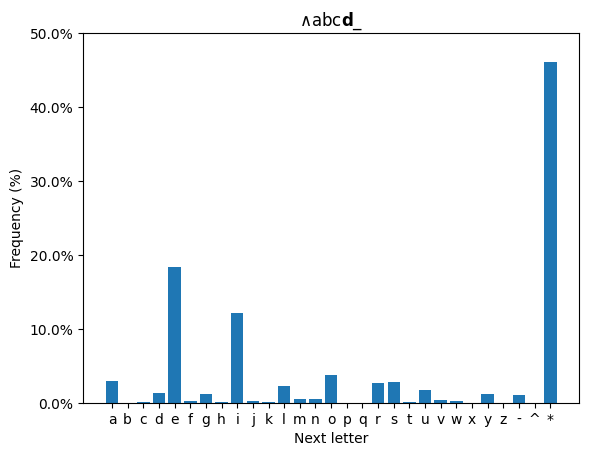

In [54]:
plot_next1('^abcd', maxi=0.5, n_letters=1)

In [64]:
for n_letters in []:#[1,2,3,4,]:
    if n_letters == 1:
        maxi = 0.25
    elif n_letters == 2:
        maxi = 0.5
    else:
        maxi = 1
    running_ch = ''
    for k, ch in enumerate('^contempt'):
        running_ch += ch
        plot_next1(running_ch, f'images/next_letter{n_letters}/next_letter_{k+1:02d}.png', maxi=maxi, n_letters=n_letters)

for n_letters in []:#[1,2,3,4,]:
    if n_letters == 1:
        maxi = 0.25
    elif n_letters == 2:
        maxi = 0.5
    else:
        maxi = 1
    running_ch = ''
    for k, ch in enumerate('^contemps'):
        running_ch += ch
        plot_next1(running_ch, f'images/next_letter{n_letters}/fr-next_letter_{k+1:02d}.png', maxi=maxi, n_letters=n_letters, lang='fr')


In [77]:
import glob
import contextlib
from PIL import Image


for n_letters in []:#[1,2,3,4,]:
    # filepaths
    fp_in = f"images/next_letter{n_letters}/next_letter_*.png"
    fp_out = f"images/next_letter{n_letters}.gif"
    # use exit stack to automatically close opened images
    with contextlib.ExitStack() as stack:
        imgs = (stack.enter_context(Image.open(f)) for f in sorted(glob.glob(fp_in)) + sorted(glob.glob(fp_in), reverse=True))
        img = next(imgs)
        img.save(fp=fp_out, format='GIF', append_images=imgs,
                save_all=True, duration=1000, loop=0)


for n_letters in []:#[1,2,3,4,]:
    # filepaths
    fp_in = f"images/next_letter{n_letters}/fr-next_letter_*.png"
    fp_out = f"images/next_letter{n_letters}-fr.gif"
    # use exit stack to automatically close opened images
    with contextlib.ExitStack() as stack:
        imgs = (stack.enter_context(Image.open(f)) for f in sorted(glob.glob(fp_in)) + sorted(glob.glob(fp_in), reverse=True))
        img = next(imgs)
        # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
        img.save(fp=fp_out, format='GIF', append_images=imgs, save_all=True, duration=1000, loop=0)


---

In [80]:
def random_wordV0(n=8):
    word = ''
    for i in range(n):
        word += random.choice(ALPHABET[:-2])
    return word

random.seed(1)
for n in range(4, 9):
    word = random_wordV0(n)
    print('n =', n, ':', word)

n = 4 : eszy
n = 5 : cidpy
n = 6 : opumzg
n = 7 : dpa-mnt
n = 8 : yyawoixz


In [90]:
def mot_aleatoireV0(n=8):
    word = ''
    for i in range(n):
        word += random.choice(ALPHABET[:-2])
    return word

random.seed(1)
for n in range(4, 9):
    word = mot_aleatoireV0(n)
    print('n =', n, ':', word)

n = 4 : eszy
n = 5 : cidpy
n = 6 : opumzg
n = 7 : dpa-mnt
n = 8 : yyawoixz


In [112]:
def random_wordV1():
    word = ''
    n = np.random.choice(np.arange(0, 30), p=words_lengths/words_lengths.sum())
    for i in range(n):
        k = np.random.choice(np.arange(0, N), p=letters_usage/letters_usage.sum())
        word += ALPHABET[k]
    return word

np.random.seed(0)
for _ in range(10):
    print(random_wordV1())

rnnioitw
smnubca
styslscodu
iesknao
ouphirap
edghniyce
oeled
odeis
scyl
nraececgiapne


In [111]:
def mot_aleatoireV1():
    word = ''
    n = np.random.choice(np.arange(0, 30), p=longueurs_mots/longueurs_mots.sum())
    for i in range(n):
        k = np.random.choice(np.arange(0, N), p=utilisation_lettres/utilisation_lettres.sum())
        word += ALPHABET[k]
    return word

np.random.seed(0)
for _ in range(10):
    print(mot_aleatoireV1())

rnnioitu
smntaba
rtvslrcodu
ierknaoo
uphiqappe
ehniv
eeoel
dcodei
cscvlvnrae
eceia


In [109]:
def random_wordV2(k=1):
    k = max(1, min(k, len(nextS)-1))
    word = '^'
    i = 0
    while i<30 and word[-1] != '*':
        letters_indexes = tuple([ALPHABET.index(letter) for letter in word[-k:]])
        Y = nextS[len(letters_indexes)][letters_indexes]
        word += ALPHABET[np.random.choice(np.arange(len(Y)), p=Y/(Y.sum()))]
        i += 1
    return word[1:-1]

np.random.seed(0)
for k in range(1,7):
    word = random_wordV2(k)
    print('k =', k, ':', word)
    if '^'+word+'*' in WORDS_LIST:
        print('(already exists)')

k = 1 : morling
k = 2 : whing
k = 3 : bable
k = 4 : worsest
k = 5 : lifting
(already exists)
k = 6 : powerful
(already exists)


In [110]:
def mot_aleatoireV2(k=1):
    k = max(1, min(k, len(nextS)-1))
    word = '^'
    i = 0
    while i<30 and word[-1] != '*':
        letters_indexes = tuple([ALPHABET.index(letter) for letter in word[-k:]])
        Y = nextSfr[len(letters_indexes)][letters_indexes]
        word += ALPHABET[np.random.choice(np.arange(len(Y)), p=Y/(Y.sum()))]
        i += 1
    return word[1:-1]

np.random.seed(0)
for k in range(1,7):
    word = mot_aleatoireV2(k)
    print('k =', k, ':', word)
    if '^'+word+'*' in LISTE_MOTS:
        print('(already exists)')

k = 1 : ksuretit
k = 2 : ever
k = 3 : acasso
k = 4 : resiliser
k = 5 : quebec
(already exists)
k = 6 : transcription
(already exists)
